In [1]:
from models import *
from utils import *
import torch
import torchinfo
import torchvision

%reload_ext autoreload
%autoreload 2

In [2]:
# load dataset
train_dataset = torchvision.datasets.MNIST(root='../datasets', train=True, download=True, transform=torchvision.transforms.ToTensor())
val_dataset = torchvision.datasets.MNIST(root='../datasets', train=False, download=True, transform=torchvision.transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, pin_memory=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=True, pin_memory=True)
model_name = 'VAE'
weights_dir = 'weights/MNIST'
history_dir = 'histories/MNIST'

os.makedirs(weights_dir, exist_ok=True)
os.makedirs(history_dir, exist_ok=True)

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")

model = VariadicAE((1, 28, 28), 32, [512]).to(device)
model.output_mean_std = True
torchinfo.summary(model, input_size=(1, 1, 28, 28))

opt = torch.optim.Adam(model.parameters())
loss_fn = BetaKLDivLoss()

history = train(model, device, train_loader, val_loader, opt, loss_fn, 50, model_name, weights_dir)
history.to_csv(os.path.join(history_dir, f'{model_name}.history.csv'))


Epoch 1: Train loss: 22.329355, Validation loss: 11.437992050170898
Epoch 2: Train loss: 9.878491, Validation loss: 8.342933764648437
Epoch 3: Train loss: 7.867145, Validation loss: 7.197726342010498
Epoch 4: Train loss: 7.020288, Validation loss: 6.568179582977295
Epoch 5: Train loss: 6.492434, Validation loss: 6.198759373474121
Epoch 6: Train loss: 6.168630, Validation loss: 5.989695111846924
Epoch 7: Train loss: 5.886463, Validation loss: 5.655989525604248
Epoch 8: Train loss: 5.693061, Validation loss: 5.589985791778564
Epoch 9: Train loss: 5.509922, Validation loss: 5.38093737411499
Epoch 10: Train loss: 5.354092, Validation loss: 5.332690821838379
Epoch 11: Train loss: 5.228248, Validation loss: 5.304464253234864
Epoch 12: Train loss: 5.133158, Validation loss: 5.118060807800293
Epoch 13: Train loss: 5.053973, Validation loss: 5.111519845581054
Epoch 14: Train loss: 4.958142, Validation loss: 4.984515000152588
Epoch 15: Train loss: 4.884361, Validation loss: 4.934620217895508
Epo

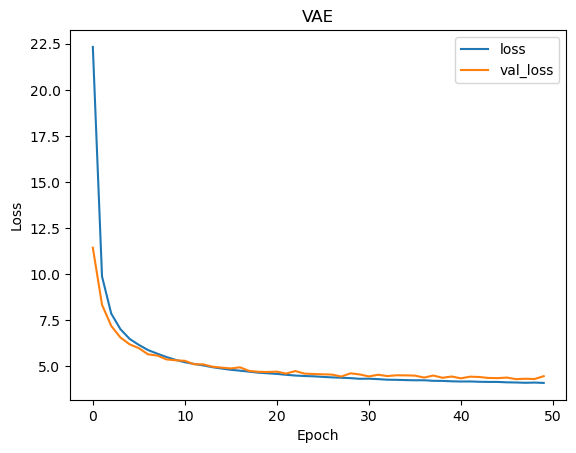

In [4]:
plot_history(model_name, history_dir)

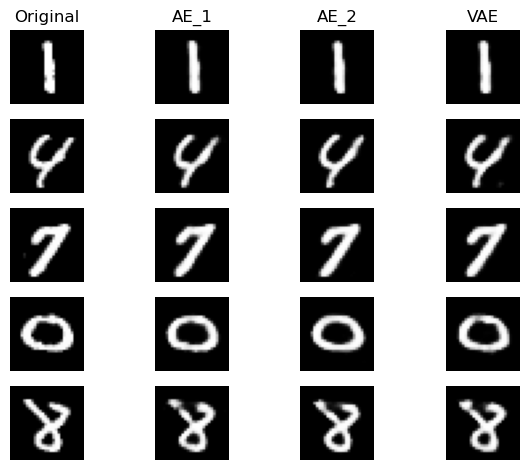

In [13]:
test_batch = next(iter(val_loader))[0][:5]
models = load_models('AE_1', 'AE_2', model_name, kind='best', model_dir=weights_dir)
show_examples(test_batch, models)